In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Function to process, clean, and pivot each dataframe
def process_and_pivot(df, prefix):
    # Fill missing numeric values with the mean and categorical values with "Not Available"
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    # Filter the relevant columns: 'Location', 'Period', and 'Value'
    df_filtered = df[['Location', 'Period', 'Value']]

    # Pivot the DataFrame so that 'Period' (Year) becomes the columns
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    # Rename the columns to have the specified prefix
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering and handle missing values again
data_for_clustering = combined_df.drop(columns=['Location'])

# Use a pipeline to handle missing values, encode categorical data, and scale the data
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Now `clustering_data` is ready for clustering algorithms
clustering_data = pd.DataFrame(clustering_data)
clustering_data.to_csv('../processed_data/processed_data2.csv', index=False)

C:\Users\albin\AppData\Local\Temp\ipykernel_2620\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_2620\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_2620\1640972367.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("N

In [3]:
import pandas as pd

# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df_filtered = df[['Location', 'Period', 'Value']]
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')

    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")

    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
#ageStandardized = pd.read_csv('../data/age_stand.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
#ageStandardized_pivoted = process_and_pivot(ageStandardized, 'ageStandardized')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
#combined_df = combined_df.merge(ageStandardized_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Inspect the combined dataframe
combined_df.to_csv('../processed_data/processed_data.csv', index=False)
combined_df

Period,Location,advertisingBan_2007,advertisingBan_2008,advertisingBan_2010,advertisingBan_2012,advertisingBan_2014,advertisingBan_2016,advertisingBan_2018,advertisingBan_2020,advertisingBan_2022,...,healthWarningPhoto_2022,requiredHealthWarnings_2007,requiredHealthWarnings_2008,requiredHealthWarnings_2010,requiredHealthWarnings_2012,requiredHealthWarnings_2014,requiredHealthWarnings_2016,requiredHealthWarnings_2018,requiredHealthWarnings_2020,requiredHealthWarnings_2022
0,Afghanistan,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,Yes,Yes,Yes,Yes
1,Albania,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Algeria,No,No,No,No,No,No,Yes,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,Andorra,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
4,Angola,No,No,No,No,No,No,No,No,No,...,Not applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
191,Yemen,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
192,Zambia,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
193,Zimbabwe,No,No,No,No,No,No,No,No,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


# Full pipeline, preprocessing, training a model, retrieving metrics and scatterplot

C:\Users\albin\AppData\Local\Temp\ipykernel_2620\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_2620\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not Available", inplace=True)
C:\Users\albin\AppData\Local\Temp\ipykernel_2620\174234112.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("Not 

silhouette_score: 0.2597191588001664
davies_bouldin_score: 1.3942770679942253


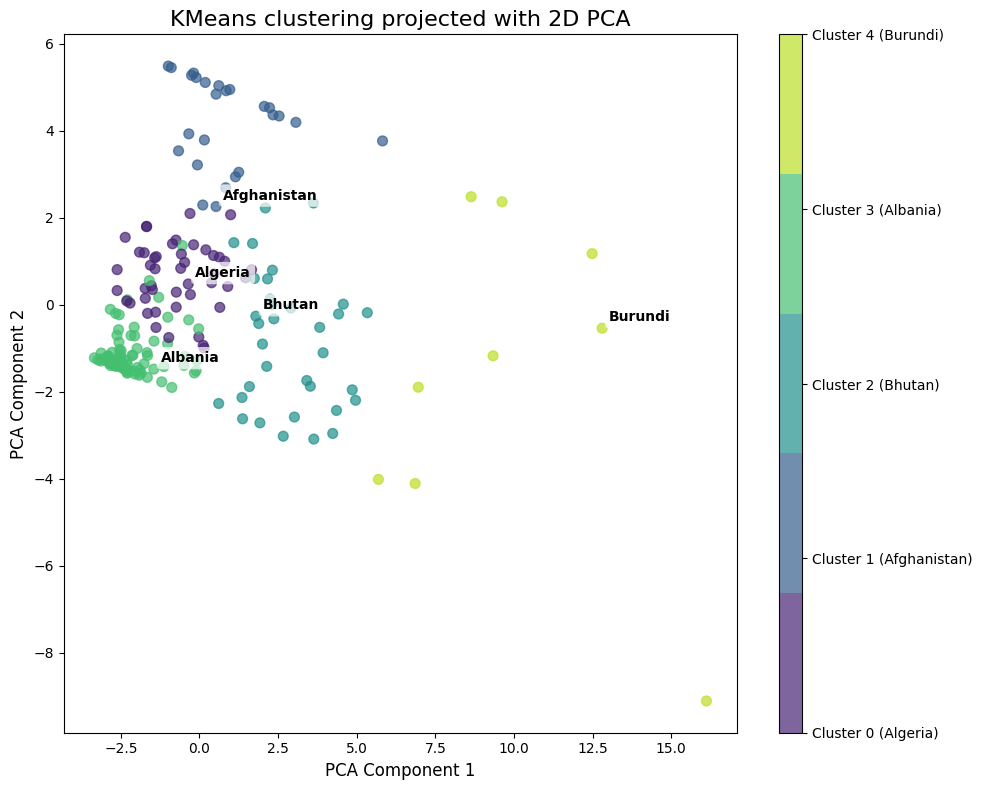

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from utils.functions import plot_clusters_2d
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from utils.functions import evaluate_clusters


# Function to process and pivot each dataframe
def process_and_pivot(df, prefix):
    df.fillna(df.mean(numeric_only=True), inplace=True)
    df.fillna("Not Available", inplace=True)
    
    df_filtered = df[['Location', 'Period', 'Value']]
    df_pivoted = df_filtered.pivot(index='Location', columns='Period', values='Value')
    df_pivoted = df_pivoted.rename(columns=lambda x: f"{prefix}_{x}")
    
    return df_pivoted.reset_index()

# Load the datasets
advertisingBan = pd.read_csv('../data/advertising_ban_internet.csv')
affordability = pd.read_csv('../data/affordability.csv')
gdp2000Cigs = pd.read_csv('../data/gdp_for_2000_cigs.csv')
healthWarningPhoto = pd.read_csv('../data/health_warning_photo.csv')
requiredHealthWarnings = pd.read_csv('../data/required_health_warning.csv')

# Process and pivot each dataframe
advertisingBan_pivoted = process_and_pivot(advertisingBan, 'advertisingBan')
affordability_pivoted = process_and_pivot(affordability, 'affordability')
gdp2000Cigs_pivoted = process_and_pivot(gdp2000Cigs, 'gdp2000Cigs')
healthWarningPhoto_pivoted = process_and_pivot(healthWarningPhoto, 'healthWarningPhoto')
requiredHealthWarnings_pivoted = process_and_pivot(requiredHealthWarnings, 'requiredHealthWarnings')

# Merge the pivoted dataframes on 'Location'
combined_df = advertisingBan_pivoted.merge(affordability_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(gdp2000Cigs_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(healthWarningPhoto_pivoted, on='Location', how='outer')
combined_df = combined_df.merge(requiredHealthWarnings_pivoted, on='Location', how='outer')

# Drop 'Location' for clustering
data_for_clustering = combined_df.drop(columns=['Location'])

# Preprocessing pipeline: imputing, encoding, and scaling
numeric_features = data_for_clustering.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data_for_clustering.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Prepare the final data for clustering
clustering_data = preprocessor.fit_transform(data_for_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data)

mask = kmeans.labels_ != -1
data = clustering_data[mask]
labels = kmeans.labels_[mask]

evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)

plot_clusters_2d(kmeans, clustering_data, combined_df)


## Plotting also handles noise variables for models which label those

silhouette_score: 0.8627241093837335
davies_bouldin_score: 0.18553837509914262


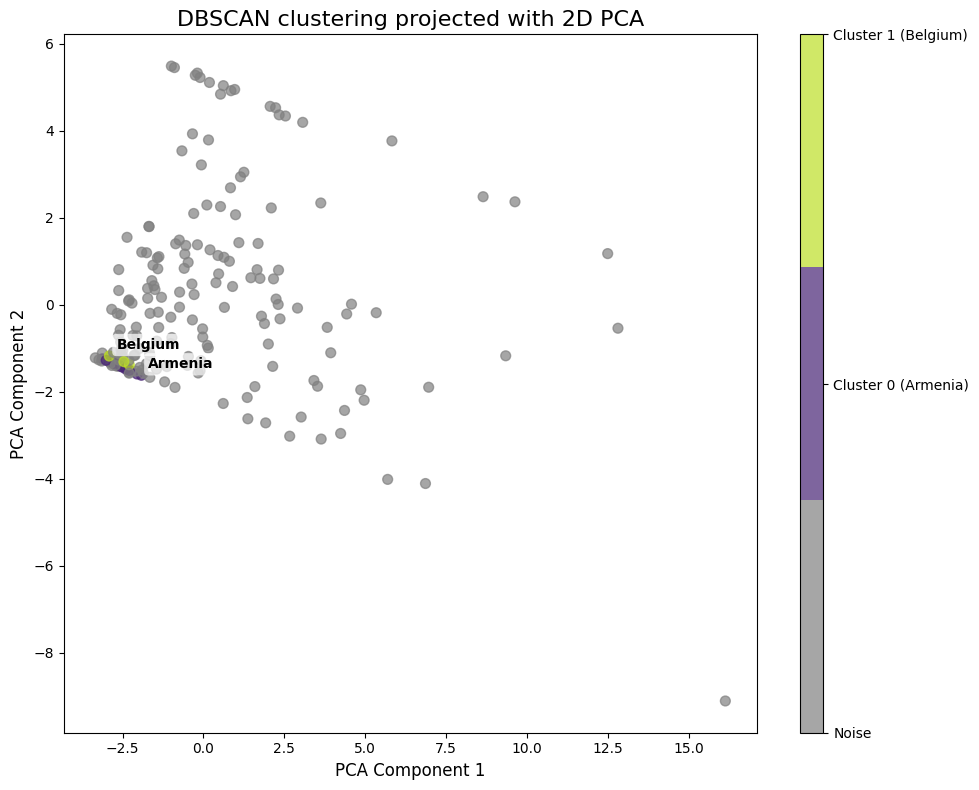

In [5]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(clustering_data)

mask = dbscan.labels_ != -1
data = clustering_data[mask]
labels = dbscan.labels_[mask]


evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)
plot_clusters_2d(dbscan, clustering_data, combined_df, noise=True)


-----------------------
Epsilon: 0.1
Min Samples: 2
silhouette_score: 0.7502131148665341
davies_bouldin_score: 0.27639593053125366
Number of clusters:  4
Number of points in cluster 0: 3
['Belgium' 'Brazil' 'Singapore']

Number of points in cluster 1: 3
['Czechia' 'Italy' 'Slovakia']

Number of points in cluster 2: 3
['Finland' 'Germany' 'Netherlands (Kingdom of the)']

Number of points in cluster 3: 2
['Japan' 'United States of America']



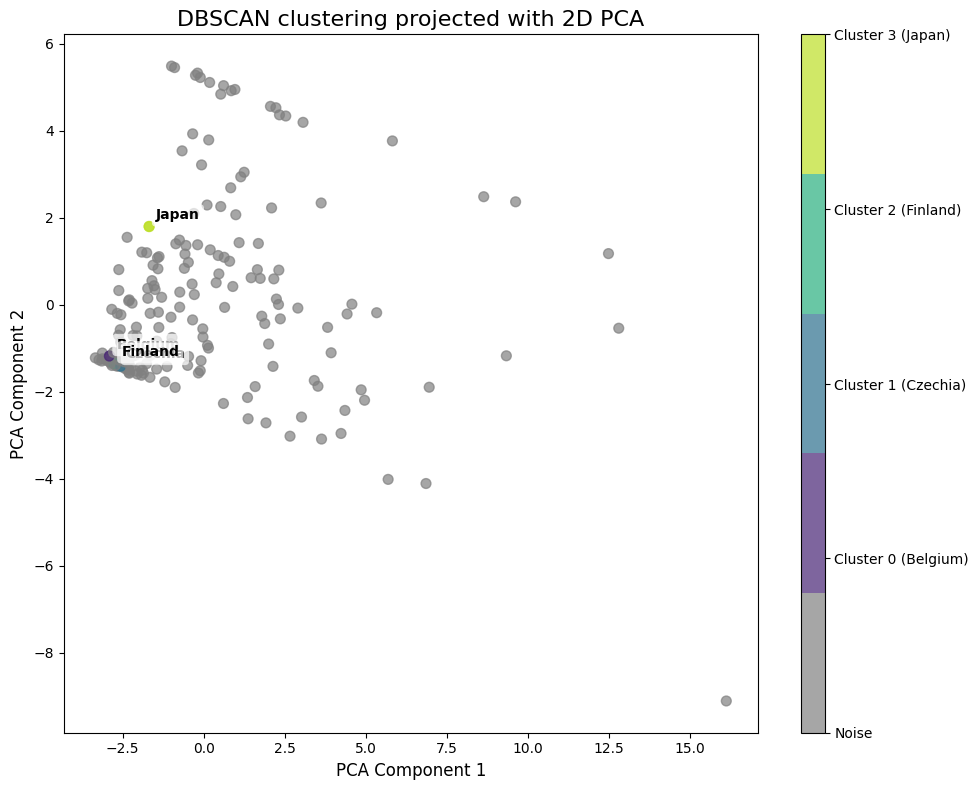

-----------------------
Epsilon: 0.1
Min Samples: 5
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  0


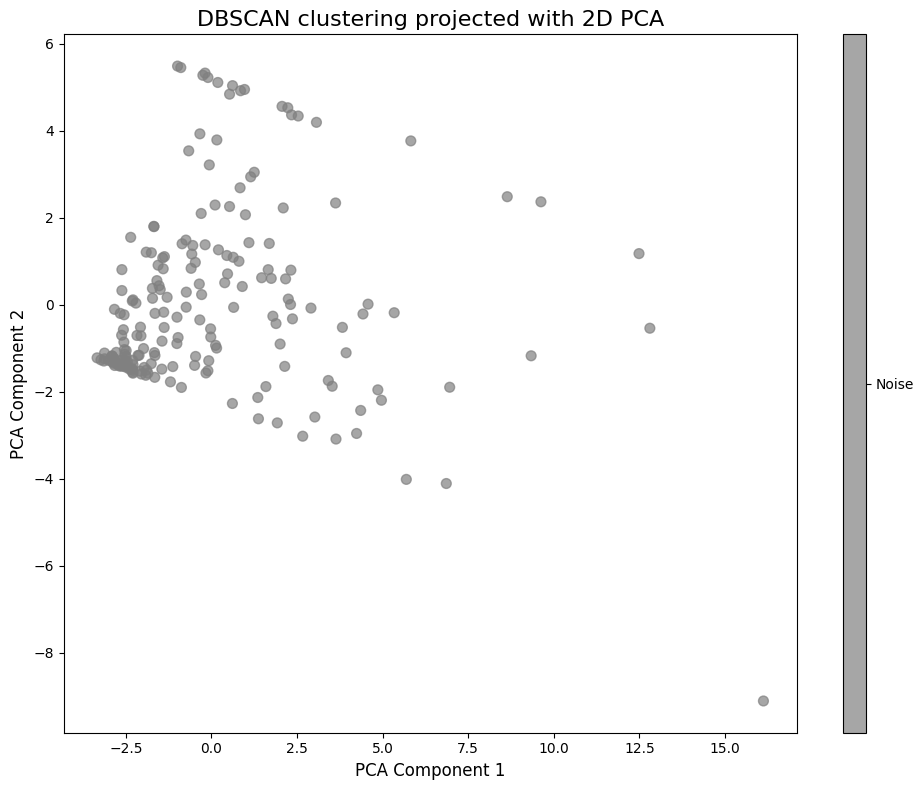

-----------------------
Epsilon: 0.1
Min Samples: 9
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  0


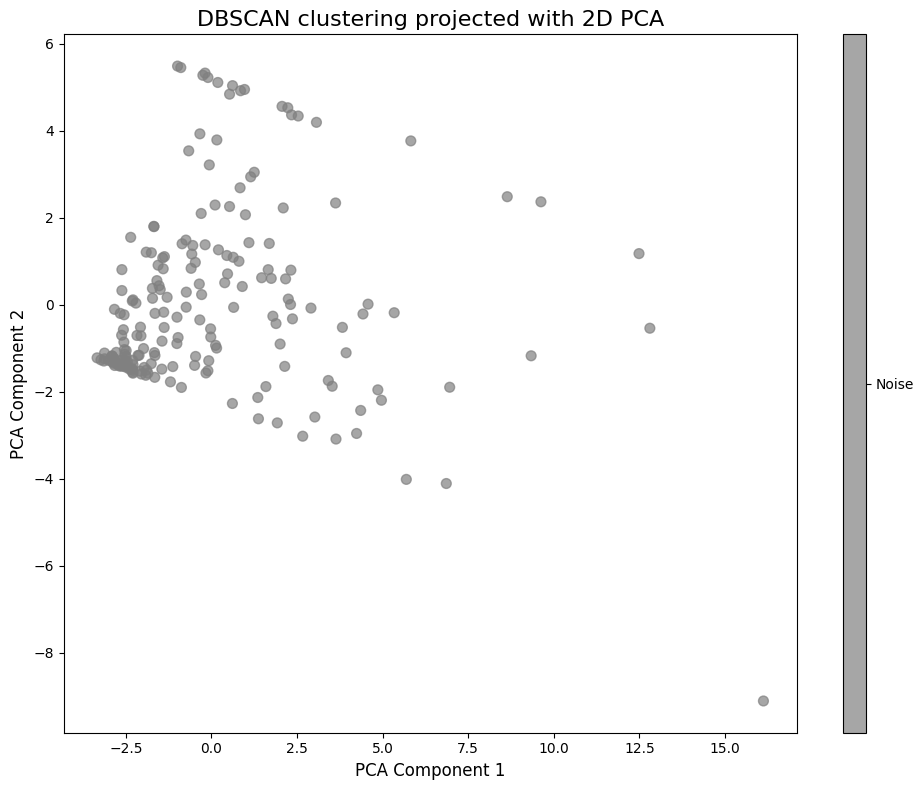

-----------------------
Epsilon: 0.1
Min Samples: 12
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  0


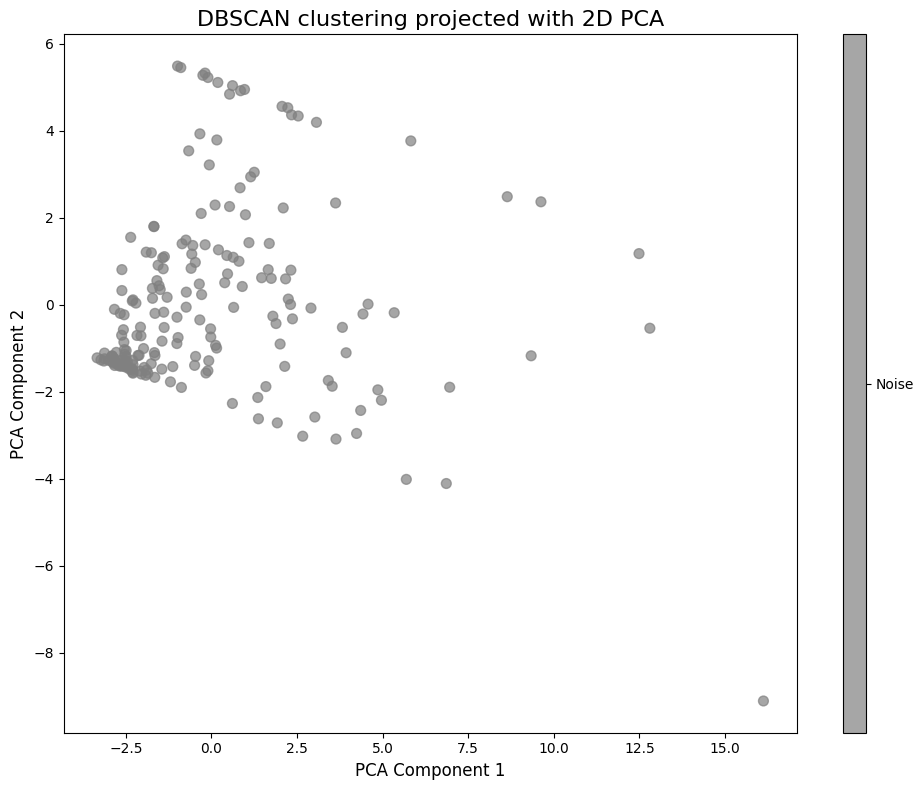

-----------------------
Epsilon: 0.75
Min Samples: 2
silhouette_score: 0.6730962394191631
davies_bouldin_score: 0.3583903083560364
Number of clusters:  20
Number of points in cluster 0: 4
['Andorra' 'Dominica' 'Equatorial Guinea'
 'Saint Vincent and the Grenadines']

Number of points in cluster 1: 2
['Angola' 'Bosnia and Herzegovina']

Number of points in cluster 2: 2
['Argentina' 'Costa Rica']

Number of points in cluster 3: 15
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Netherlands (Kingdom of the)' 'Poland'
 'Portugal' 'Republic of Korea' 'Slovakia']

Number of points in cluster 4: 2
['Azerbaijan' 'Serbia']

Number of points in cluster 5: 2
['Barbados' 'Saint Lucia']

Number of points in cluster 6: 8
['Belgium' 'Brazil' 'Chile' 'New Zealand' 'Romania' 'Singapore' 'Thailand'
 'United Kingdom of Great Britain and Northern Ireland']

Number of points in cluster 7: 4
['Belize' 'Dominican Republic' 'Guatemala' 'Morocco']

Number 

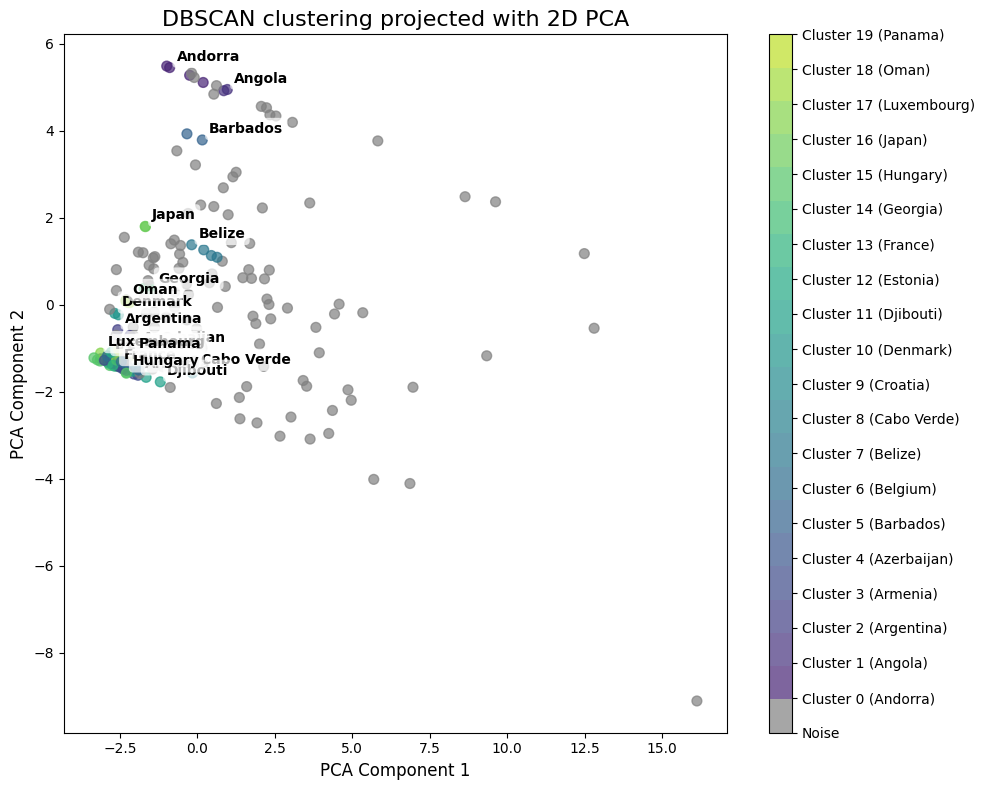

-----------------------
Epsilon: 0.75
Min Samples: 5
silhouette_score: 0.7076467141206748
davies_bouldin_score: 0.4419597065912273
Number of clusters:  4
Number of points in cluster 0: 15
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Netherlands (Kingdom of the)' 'Poland'
 'Portugal' 'Republic of Korea' 'Slovakia']

Number of points in cluster 1: 8
['Belgium' 'Brazil' 'Chile' 'New Zealand' 'Romania' 'Singapore' 'Thailand'
 'United Kingdom of Great Britain and Northern Ireland']

Number of points in cluster 2: 6
['Hungary' 'Iceland' 'Kazakhstan' 'Kuwait' 'Qatar' 'Viet Nam']

Number of points in cluster 3: 5
['Egypt' 'Iran (Islamic Republic of)' 'Malaysia' 'Mongolia'
 'North Macedonia']



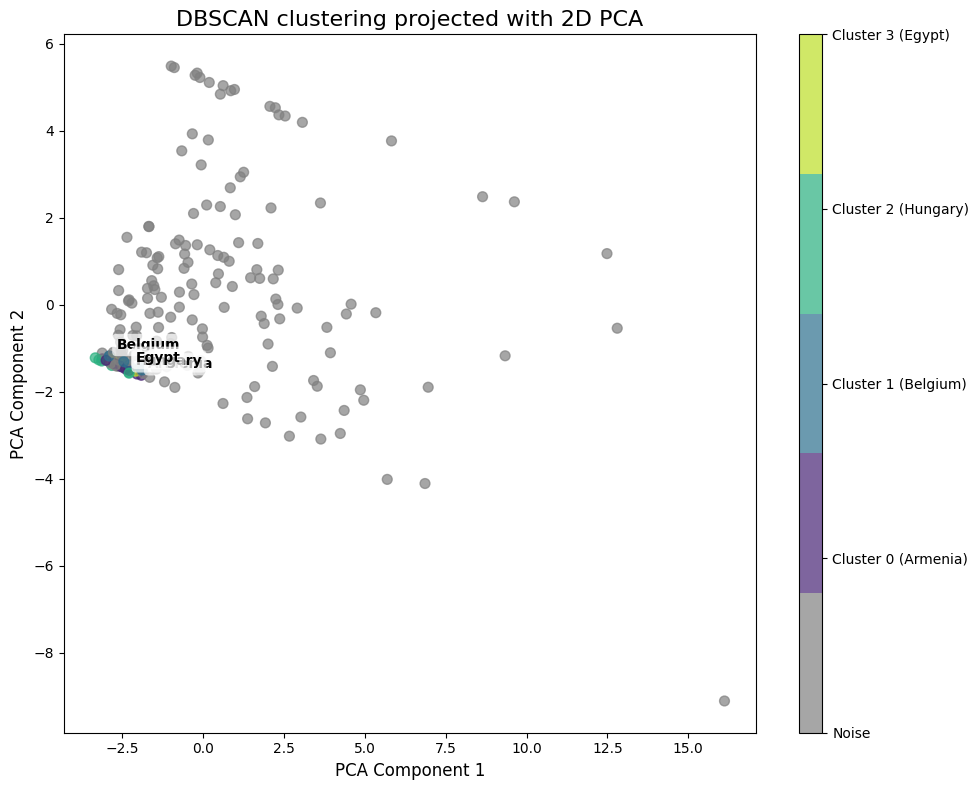

-----------------------
Epsilon: 0.75
Min Samples: 9
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 15
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Netherlands (Kingdom of the)' 'Poland'
 'Portugal' 'Republic of Korea' 'Slovakia']



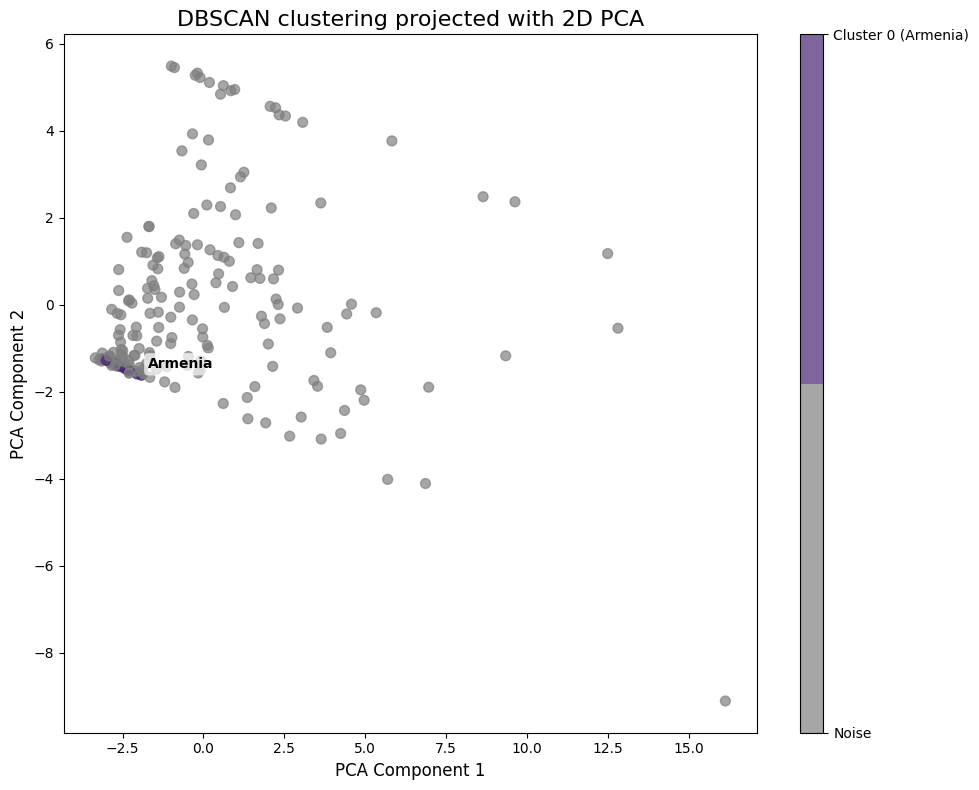

-----------------------
Epsilon: 0.75
Min Samples: 12
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 15
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Netherlands (Kingdom of the)' 'Poland'
 'Portugal' 'Republic of Korea' 'Slovakia']



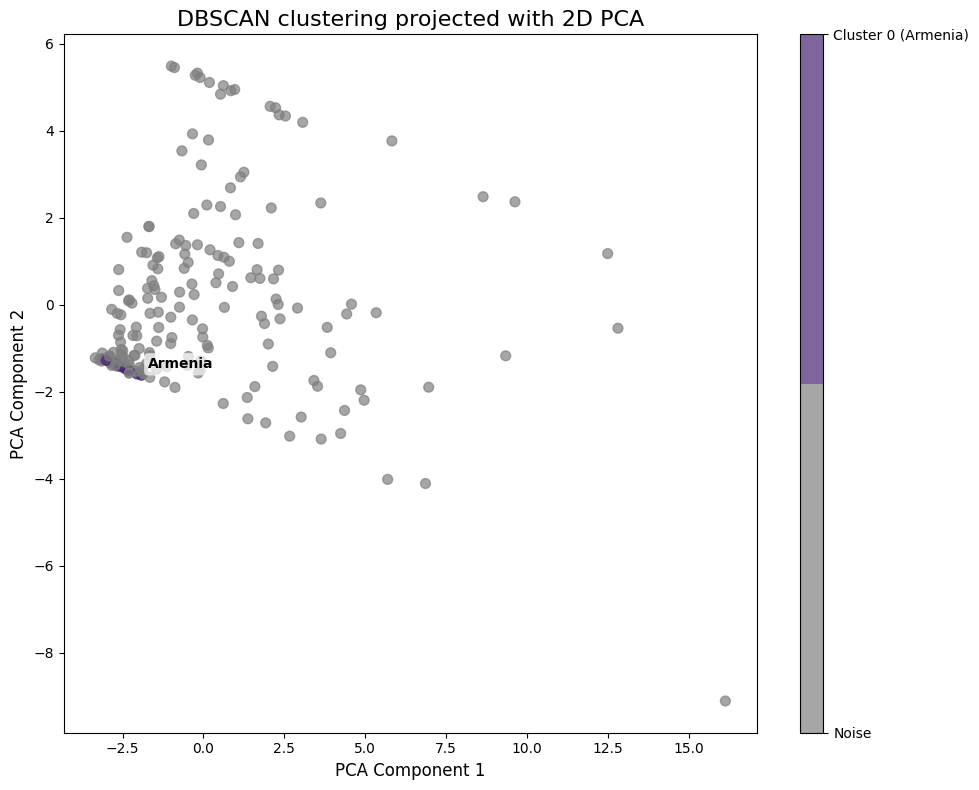

-----------------------
Epsilon: 1.4000000000000001
Min Samples: 2
silhouette_score: 0.5967446040188971
davies_bouldin_score: 0.46170693404931495
Number of clusters:  25
Number of points in cluster 0: 9
['Andorra' 'Angola' 'Bosnia and Herzegovina' 'Dominica'
 'Equatorial Guinea' 'Grenada' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'San Marino']

Number of points in cluster 1: 2
['Argentina' 'Costa Rica']

Number of points in cluster 2: 16
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Myanmar' 'Netherlands (Kingdom of the)'
 'Poland' 'Portugal' 'Republic of Korea' 'Slovakia']

Number of points in cluster 3: 2
['Azerbaijan' 'Serbia']

Number of points in cluster 4: 8
['Bahamas' 'Belize' 'Dominican Republic' 'Guatemala' 'Japan'
 'Marshall Islands' 'Morocco' 'United States of America']

Number of points in cluster 5: 2
['Bahrain' 'Seychelles']

Number of points in cluster 6: 2
['Barbados' 'Saint Lucia']

Number of po

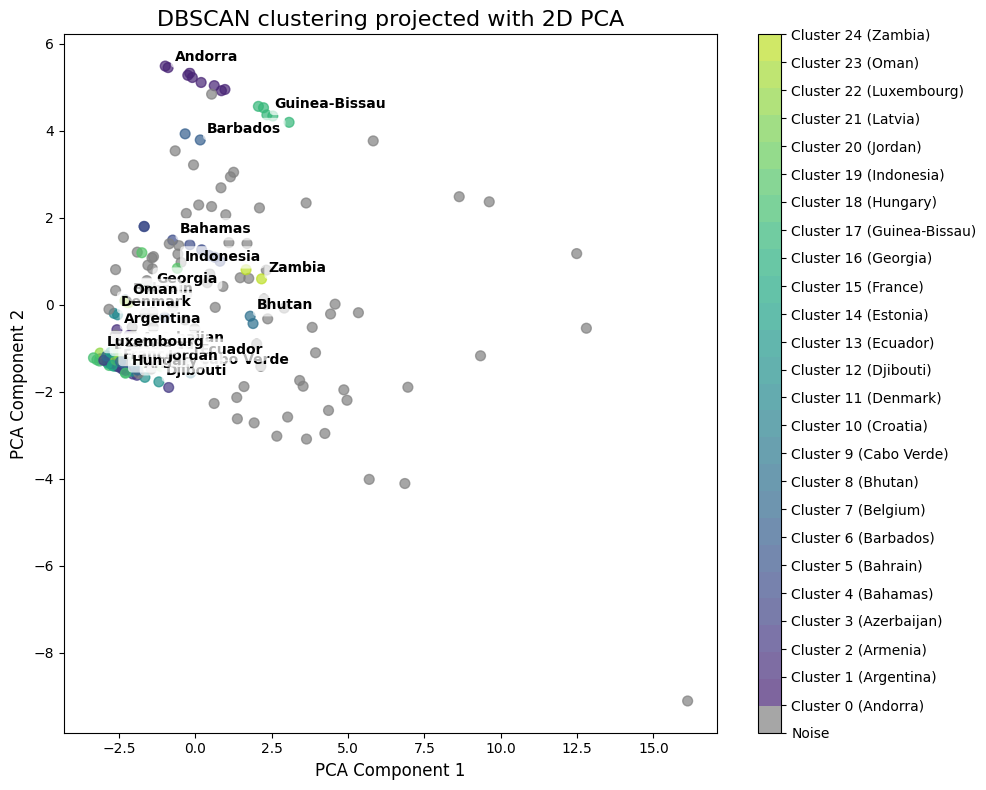

-----------------------
Epsilon: 1.4000000000000001
Min Samples: 5
silhouette_score: 0.6282075764168299
davies_bouldin_score: 0.5470708675605016
Number of clusters:  7
Number of points in cluster 0: 9
['Andorra' 'Angola' 'Bosnia and Herzegovina' 'Dominica'
 'Equatorial Guinea' 'Grenada' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'San Marino']

Number of points in cluster 1: 16
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Myanmar' 'Netherlands (Kingdom of the)'
 'Poland' 'Portugal' 'Republic of Korea' 'Slovakia']

Number of points in cluster 2: 8
['Bahamas' 'Belize' 'Dominican Republic' 'Guatemala' 'Japan'
 'Marshall Islands' 'Morocco' 'United States of America']

Number of points in cluster 3: 8
['Belgium' 'Brazil' 'Chile' 'New Zealand' 'Romania' 'Singapore' 'Thailand'
 'United Kingdom of Great Britain and Northern Ireland']

Number of points in cluster 4: 7
['Djibouti' 'Egypt' 'Iran (Islamic Republic of)' 'Mala

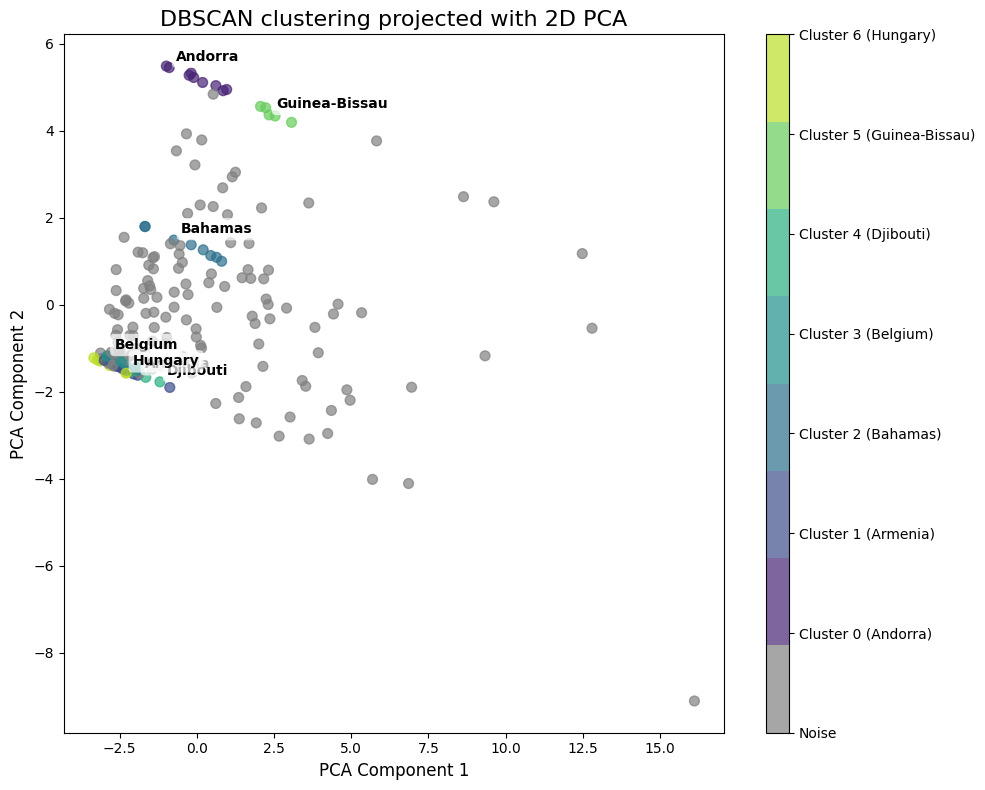

-----------------------
Epsilon: 1.4000000000000001
Min Samples: 9
silhouette_score: 0.8859110316381303
davies_bouldin_score: 0.1700006524422487
Number of clusters:  2
Number of points in cluster 0: 16
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Myanmar' 'Netherlands (Kingdom of the)'
 'Poland' 'Portugal' 'Republic of Korea' 'Slovakia']

Number of points in cluster 1: 9
['Andorra' 'Angola' 'Bosnia and Herzegovina' 'Dominica'
 'Equatorial Guinea' 'Grenada' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'San Marino']



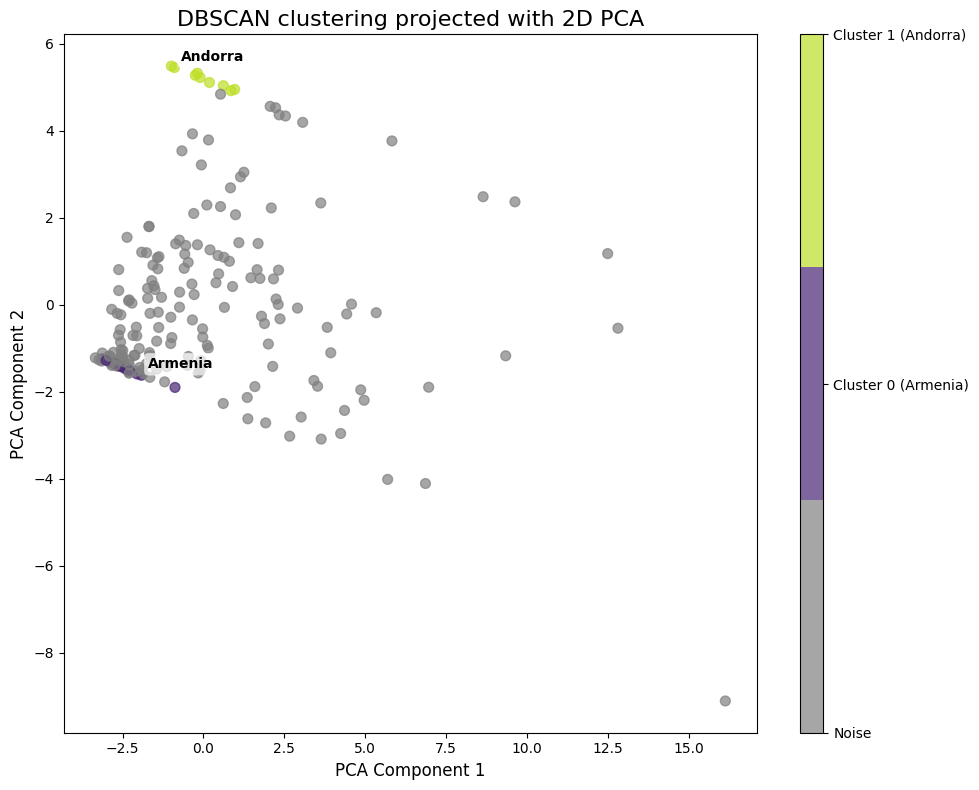

-----------------------
Epsilon: 1.4000000000000001
Min Samples: 12
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 16
['Armenia' 'Austria' 'Belarus' 'Bulgaria' 'Czechia' 'Finland' 'Germany'
 'Greece' 'Italy' 'Lithuania' 'Myanmar' 'Netherlands (Kingdom of the)'
 'Poland' 'Portugal' 'Republic of Korea' 'Slovakia']



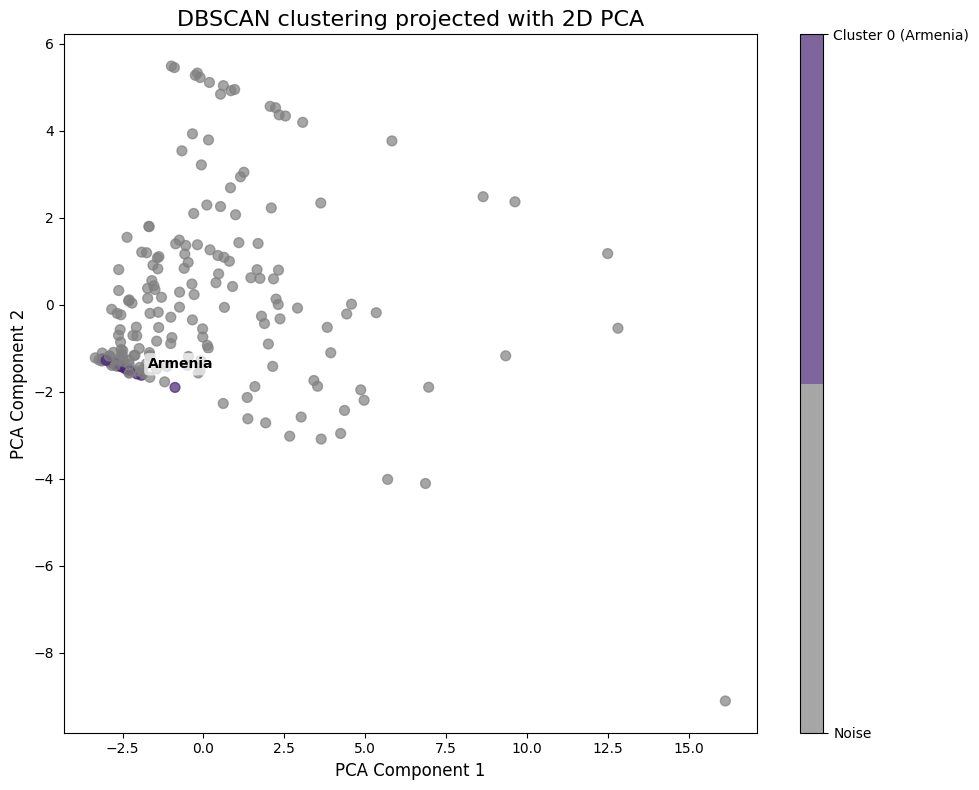

-----------------------
Epsilon: 2.0500000000000003
Min Samples: 2
silhouette_score: 0.3310006290936071
davies_bouldin_score: 0.8104708753614694
Number of clusters:  15
Number of points in cluster 0: 70
['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Iran (Islamic Republic of)' 'Italy' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Latvia' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Mongolia' 'Montenegro'
 'Myanmar' 'Netherlands (Kingdom of the)' 'New Zealand' 'North Macedonia'
 'Norway' 'Oman' 'Panama' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Republic of Korea' 'Romania' 'Russian Federation' 'Saudi Arabia'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Thailand' 'Türkiye'
 'United Ar

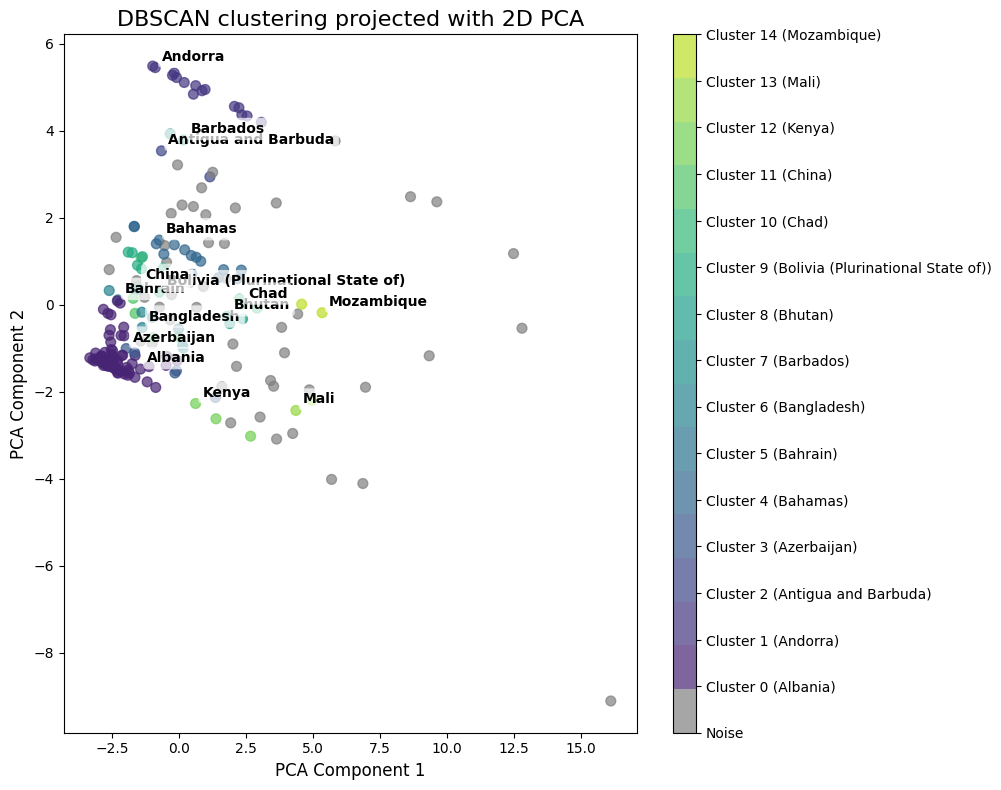

-----------------------
Epsilon: 2.0500000000000003
Min Samples: 5
silhouette_score: 0.4347964030842298
davies_bouldin_score: 0.744479879759493
Number of clusters:  4
Number of points in cluster 0: 15
['Andorra' 'Angola' 'Bosnia and Herzegovina' 'Dominica'
 'Equatorial Guinea' 'Grenada' 'Guinea-Bissau' 'Haiti'
 'Micronesia (Federated States of)' 'Monaco' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'San Marino' 'Sierra Leone' 'Somalia']

Number of points in cluster 1: 69
['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Egypt' 'El Salvador' 'Estonia'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Iran (Islamic Republic of)' 'Italy' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Latvia' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Mongolia' 'Montenegro'
 'Myanmar' 'Netherland

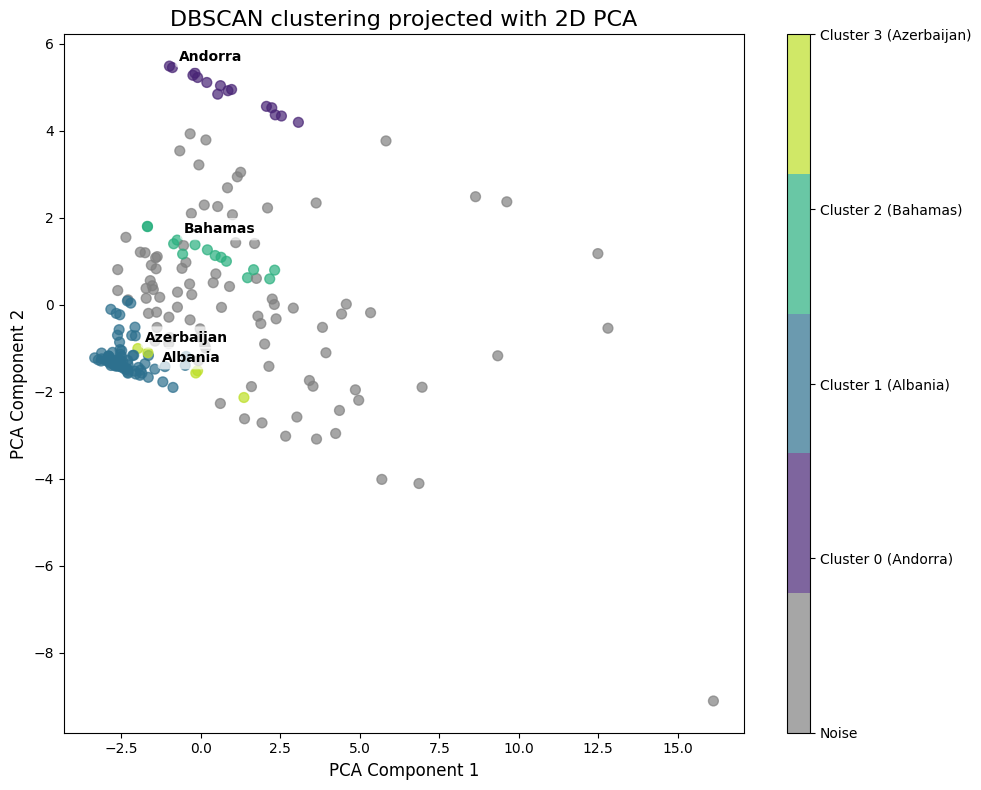

-----------------------
Epsilon: 2.0500000000000003
Min Samples: 9
silhouette_score: 0.5667042364807019
davies_bouldin_score: 0.5866175636125411
Number of clusters:  3
Number of points in cluster 0: 14
['Andorra' 'Angola' 'Bosnia and Herzegovina' 'Dominica'
 'Equatorial Guinea' 'Grenada' 'Guinea-Bissau' 'Haiti'
 'Micronesia (Federated States of)' 'Monaco' 'Saint Kitts and Nevis'
 'Saint Vincent and the Grenadines' 'San Marino' 'Somalia']

Number of points in cluster 1: 68
['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Belarus' 'Belgium'
 'Brazil' 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Egypt' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland'
 'Iran (Islamic Republic of)' 'Italy' 'Jordan' 'Kazakhstan' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Latvia' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Mongolia' 'Montenegro'
 'Myanmar' 'Netherlands (Kingdom of the)' 'New Zea

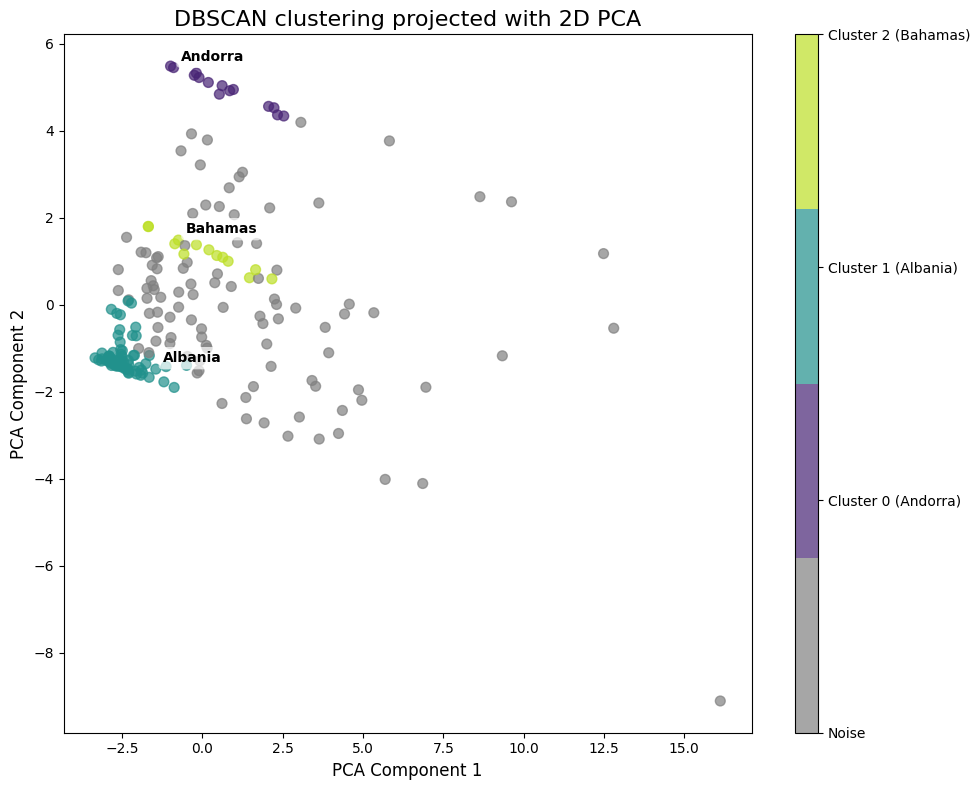

-----------------------
Epsilon: 2.0500000000000003
Min Samples: 12
silhouette_score: 0.6854019157141632
davies_bouldin_score: 0.4373950242542787
Number of clusters:  2
Number of points in cluster 0: 60
['Albania' 'Armenia' 'Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil'
 'Bulgaria' 'Canada' 'Chile' 'Colombia' 'Croatia' 'Cyprus' 'Czechia'
 'Djibouti' 'Egypt' 'Estonia' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'Iran (Islamic Republic of)' 'Italy' 'Jordan'
 'Kazakhstan' 'Kuwait' 'Kyrgyzstan' "Lao People's Democratic Republic"
 'Latvia' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius'
 'Mongolia' 'Myanmar' 'Netherlands (Kingdom of the)' 'New Zealand'
 'North Macedonia' 'Norway' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Republic of Korea' 'Romania' 'Singapore' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'Thailand' 'Türkiye'
 'United Kingdom of Great Britain and Northern Ireland' 'Uruguay'
 'Viet Nam']

Number of points in cluster 1: 14
['Andorra' 'A

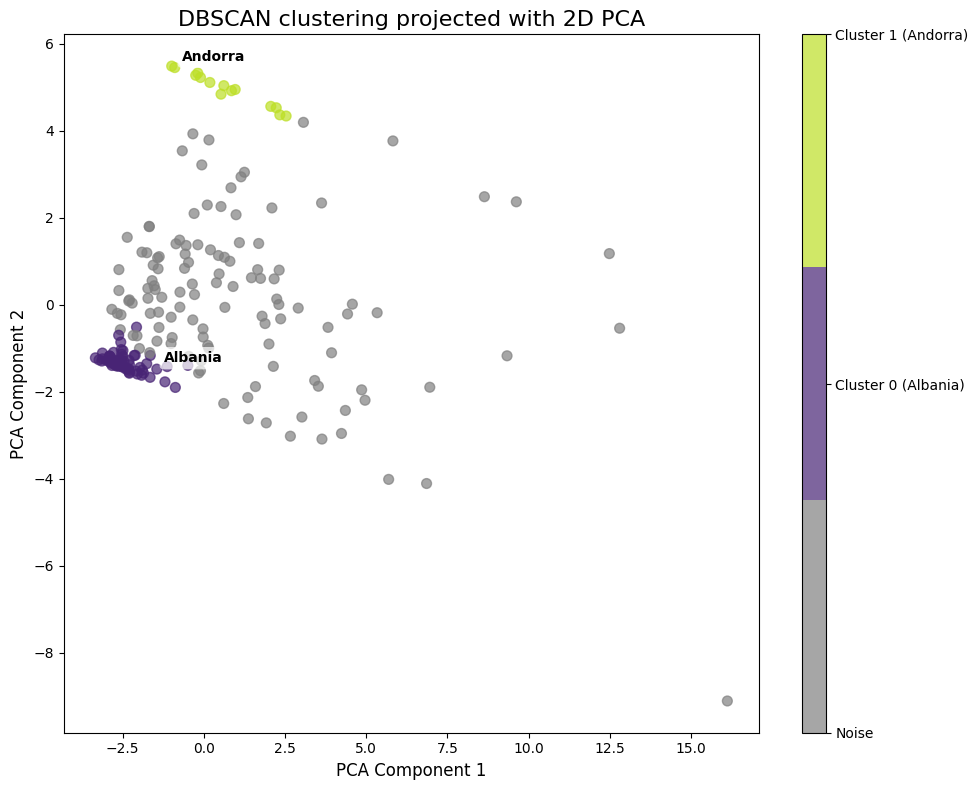

-----------------------
Epsilon: 2.7
Min Samples: 2
silhouette_score: 0.10395788330849062
davies_bouldin_score: 0.9448764246690257
Number of clusters:  10
Number of points in cluster 0: 4
['Afghanistan' 'Antigua and Barbuda' 'Mauritania' 'Niue']

Number of points in cluster 1: 131
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cabo Verde' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana'
 'Honduras' 'Hungary' 'Iceland' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 

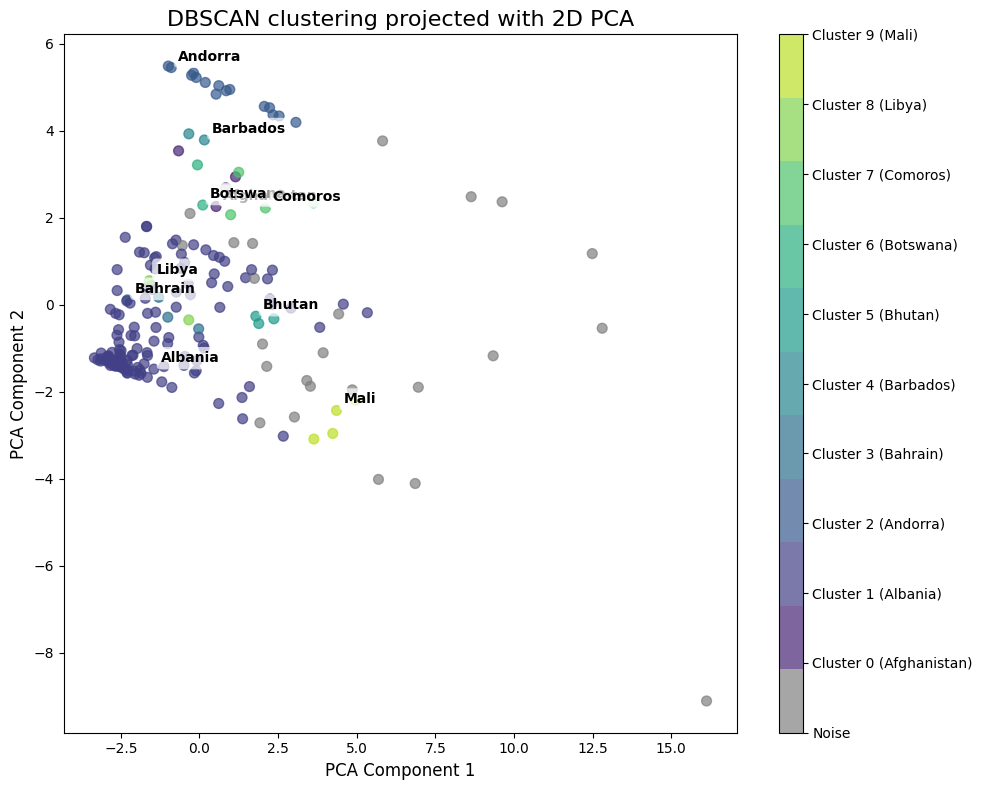

-----------------------
Epsilon: 2.7
Min Samples: 5
silhouette_score: 0.4521119174268868
davies_bouldin_score: 0.6923616042152729
Number of clusters:  2
Number of points in cluster 0: 127
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cabo Verde' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Fiji' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana'
 'Honduras' 'Hungary' 'Iceland' 'Indonesia' 'Iran (Islamic Republic of)'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kuwait' 'Kyrgyzstan' "Lao People's Democratic Republic" 'Latvia'
 'Lebanon' 'Lithuania' 'Luxembourg' '

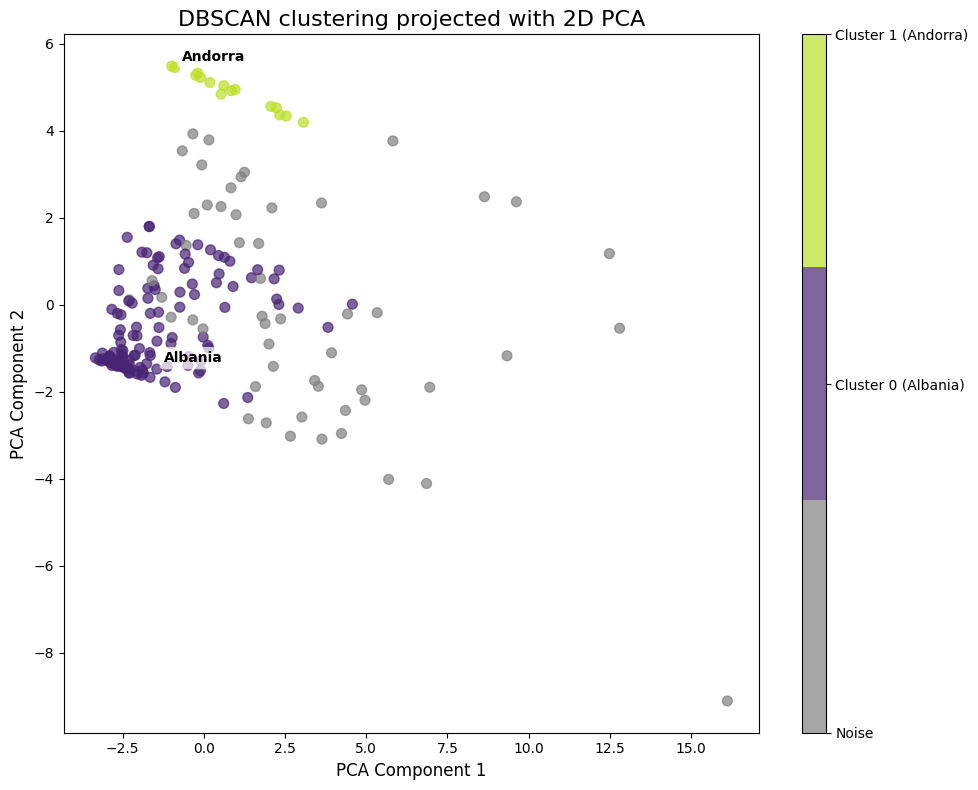

-----------------------
Epsilon: 2.7
Min Samples: 9
silhouette_score: 0.4684433466269899
davies_bouldin_score: 0.6730428424511224
Number of clusters:  2
Number of points in cluster 0: 123
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bolivia (Plurinational State of)' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cabo Verde' 'Cameroon' 'Canada' 'Chad' 'Chile' 'China'
 'Colombia' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Honduras'
 'Hungary' 'Iceland' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait'
 'Kyrgyzstan' "Lao People's Democratic Republic" 'Latvia' 'Lebanon'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldiv

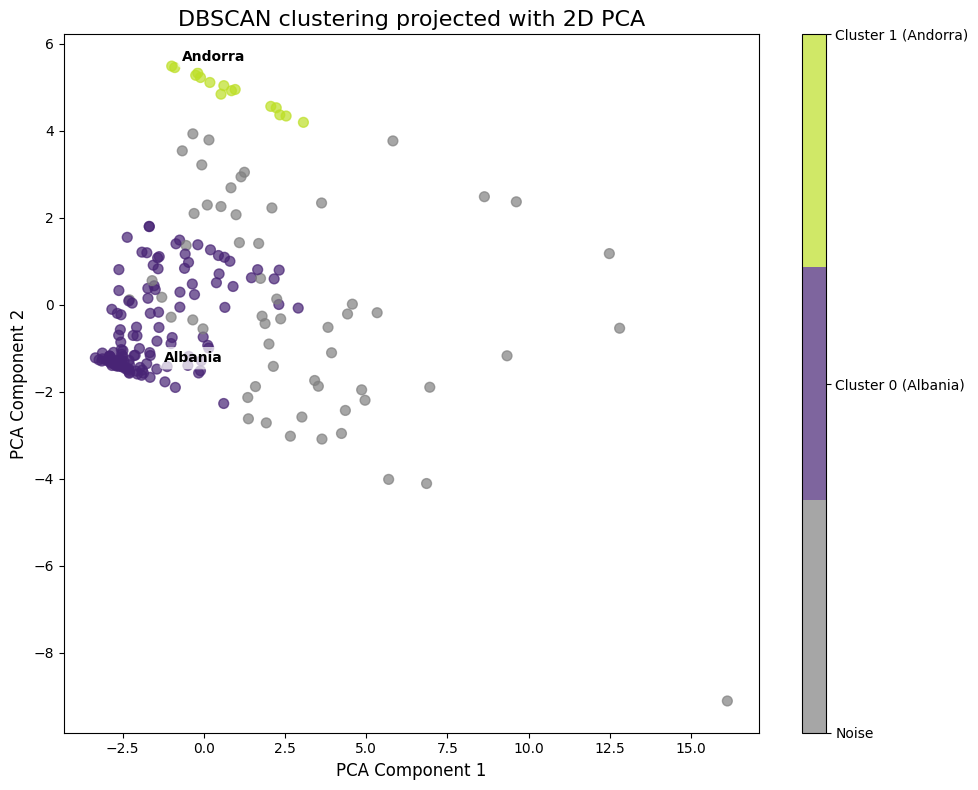

-----------------------
Epsilon: 2.7
Min Samples: 12
silhouette_score: 0.41574608494617127
davies_bouldin_score: 0.8793870985520517
Number of clusters:  3
Number of points in cluster 0: 88
['Albania' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Cook Islands' 'Costa Rica' 'Croatia'
 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guinea' 'Guyana' 'Hungary' 'Iceland' 'Iran (Islamic Republic of)' 'Iraq'
 'Italy' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' 'Lebanon' 'Lithuania'
 'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Mauritius' 'Mongolia'
 'Montenegro' 'Myanmar' 'Netherlands (Kingdom of the)' 'New Zealand'
 'Nigeria' 'North Macedonia' 'Norway' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal' 'Qatar' 'Republic of Ko

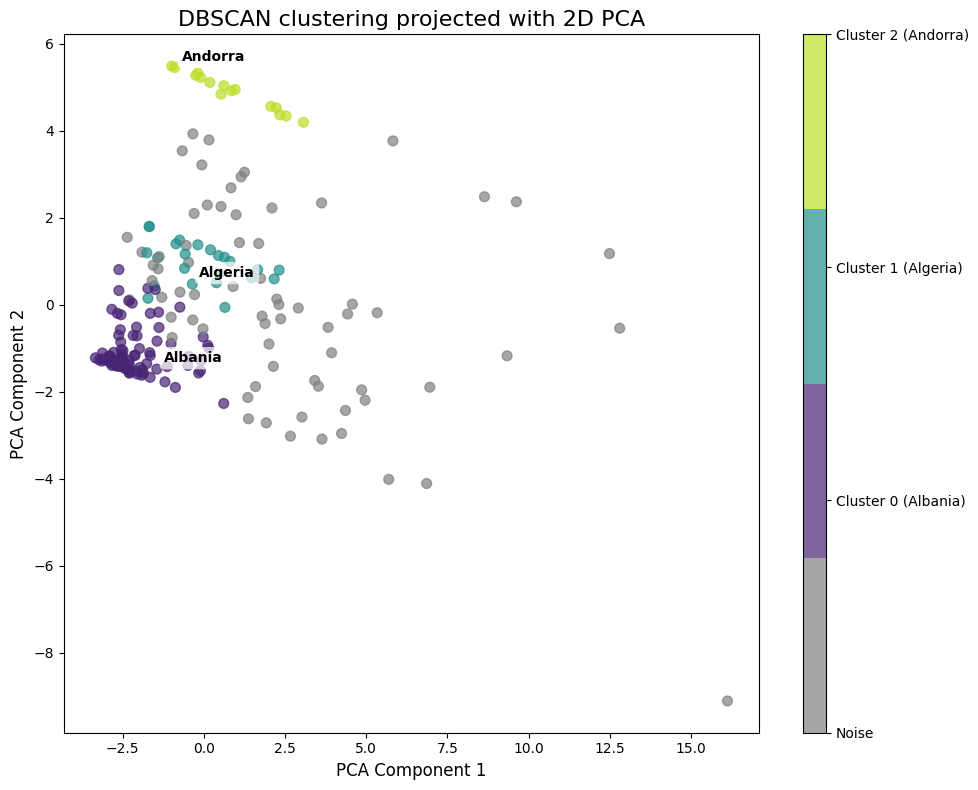

-----------------------
Epsilon: 3.35
Min Samples: 2
silhouette_score: 0.24912695000293147
davies_bouldin_score: 0.7825598187122332
Number of clusters:  4
Number of points in cluster 0: 162
['Afghanistan' 'Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'I

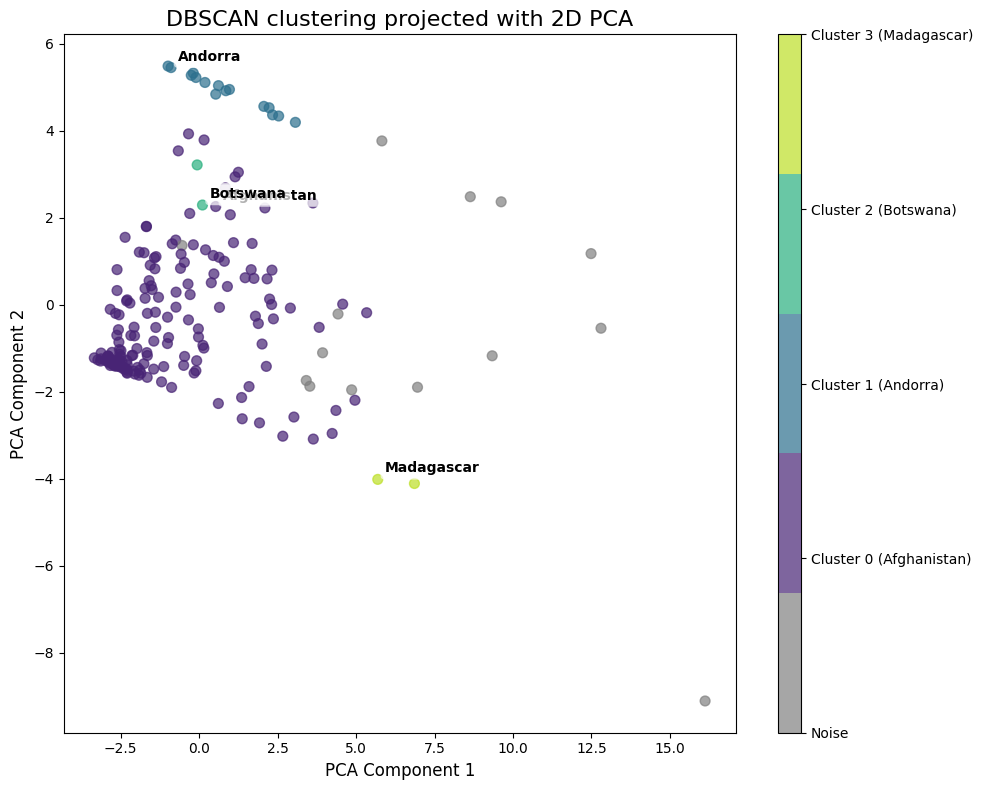

-----------------------
Epsilon: 3.35
Min Samples: 5
silhouette_score: 0.27316925329444397
davies_bouldin_score: 1.0233348778940135
Number of clusters:  3
Number of points in cluster 0: 154
['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bolivia (Plurinational State of)' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo'
 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' "Democratic People's Republic of Korea" 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland'
 'Israel' 'Italy' 'Jamaica' 

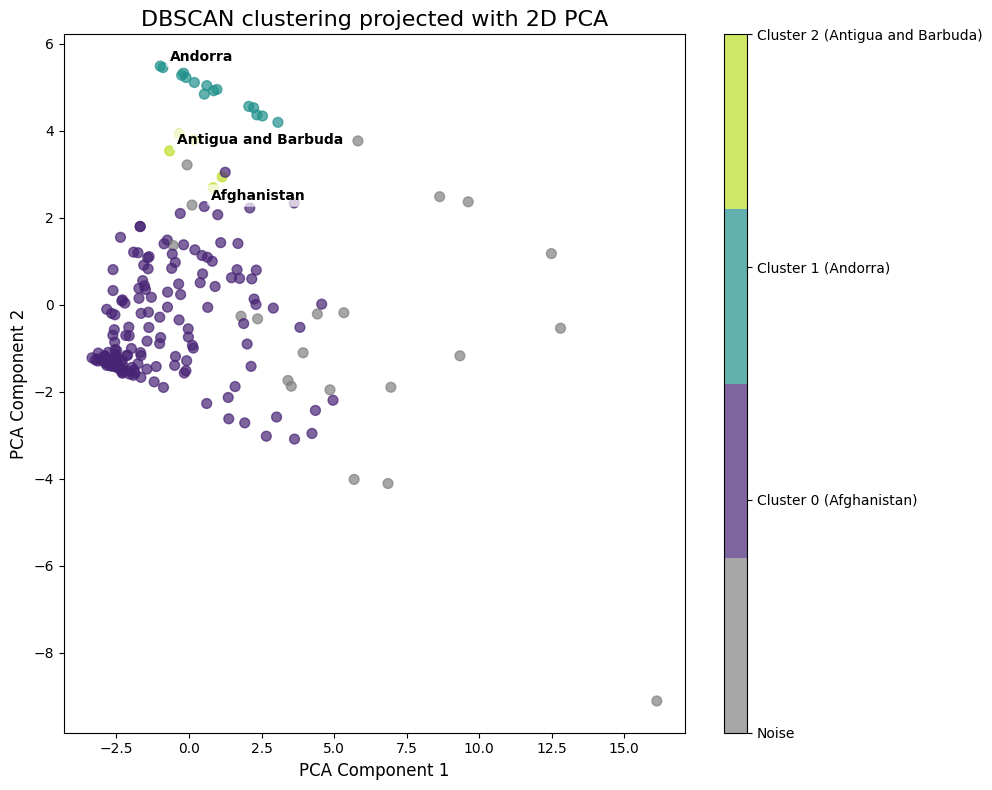

-----------------------
Epsilon: 3.35
Min Samples: 9
silhouette_score: 0.41683814730399077
davies_bouldin_score: 0.7280110125074546
Number of clusters:  2
Number of points in cluster 0: 141
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bolivia (Plurinational State of)' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao P

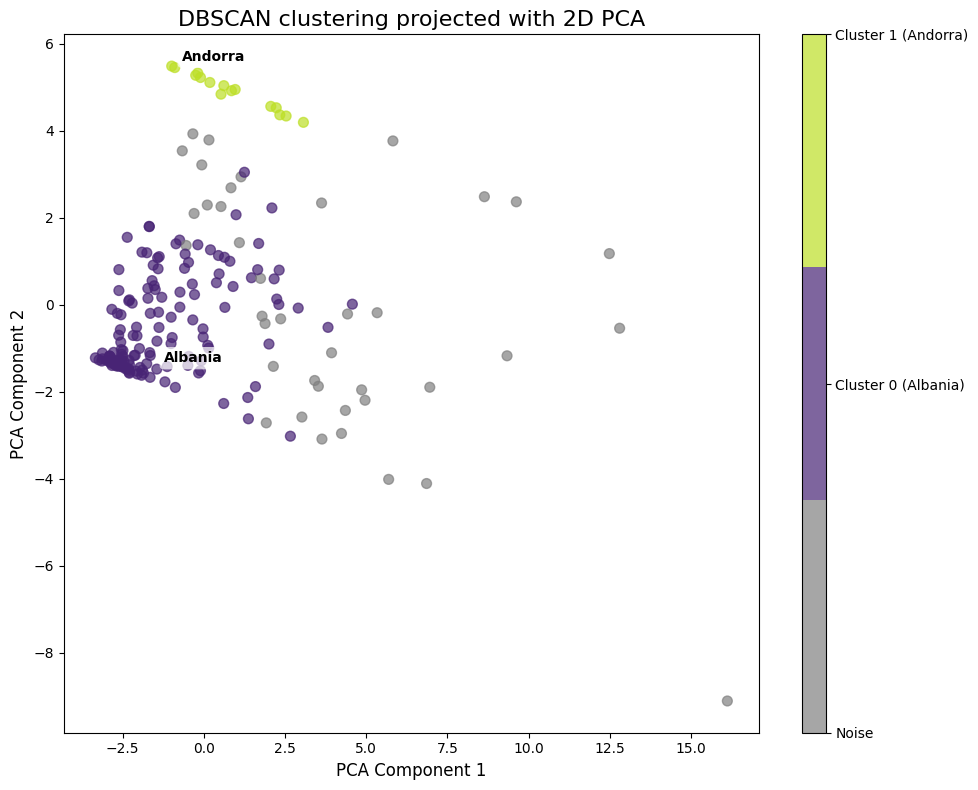

-----------------------
Epsilon: 3.35
Min Samples: 12
silhouette_score: 0.42601785133652786
davies_bouldin_score: 0.7182173580488316
Number of clusters:  2
Number of points in cluster 0: 137
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bolivia (Plurinational State of)' 'Brazil'
 'Brunei Darussalam' 'Bulgaria' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's D

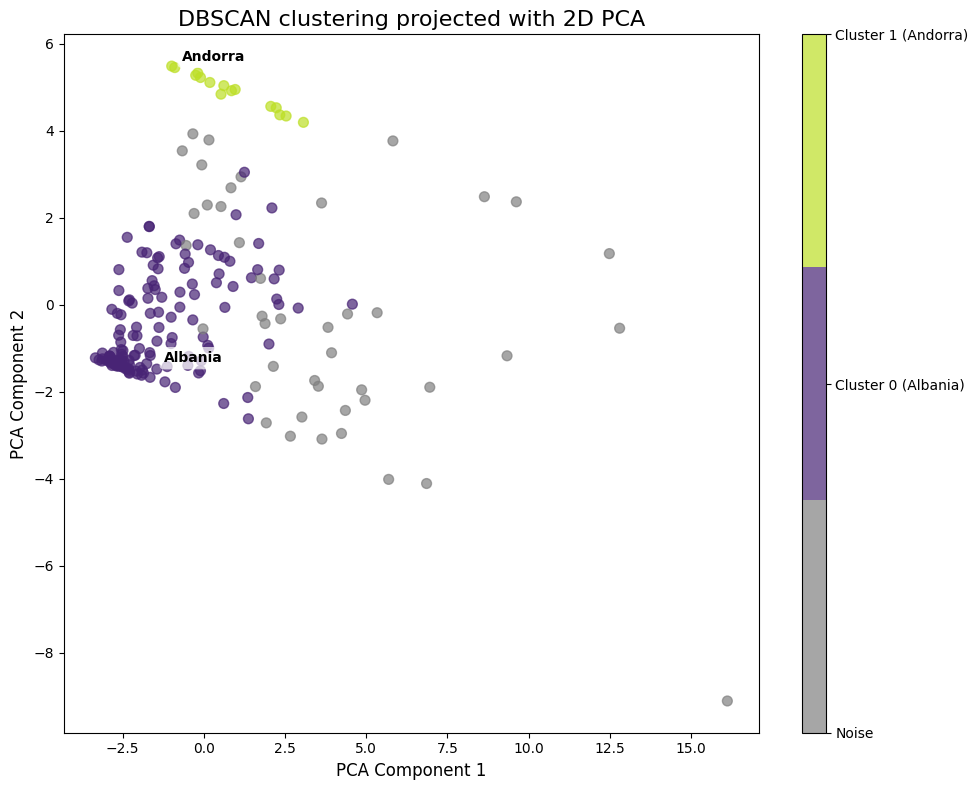

-----------------------
Epsilon: 4.0
Min Samples: 2
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 188
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Fin

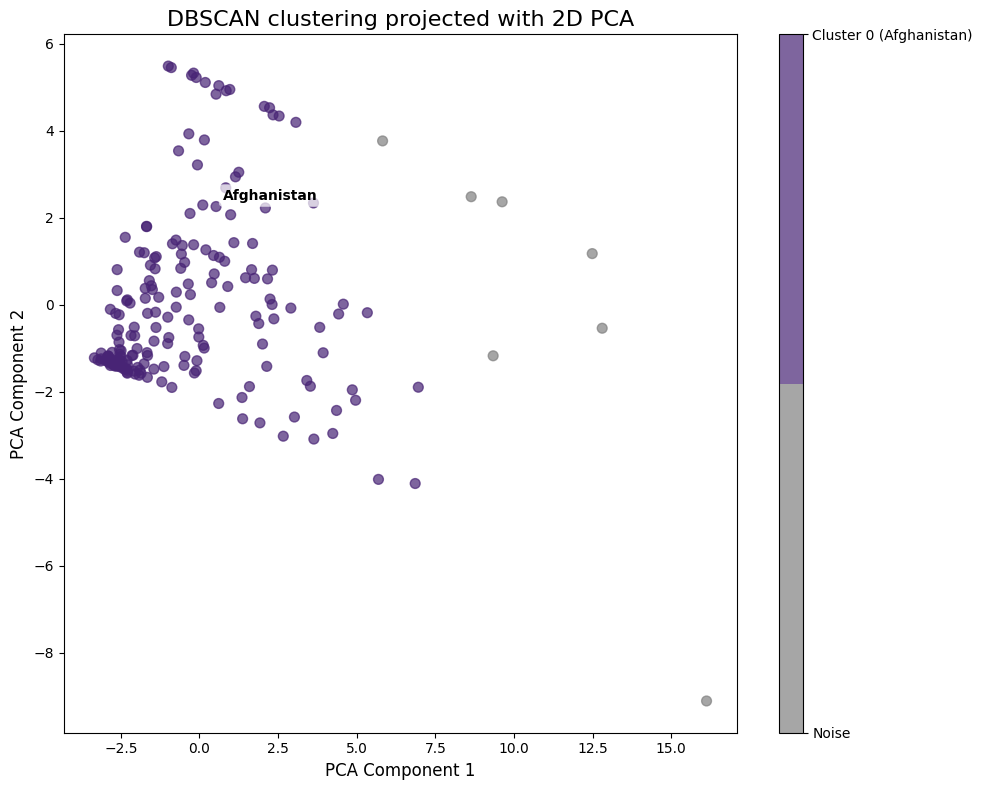

-----------------------
Epsilon: 4.0
Min Samples: 5
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 186
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Fin

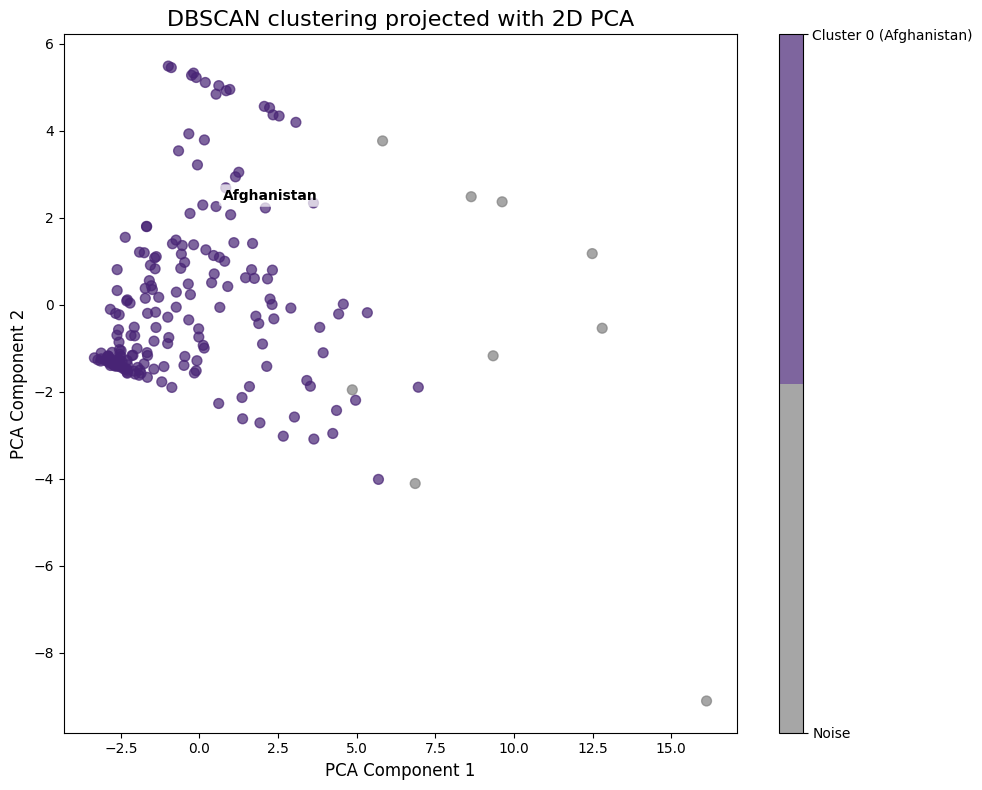

-----------------------
Epsilon: 4.0
Min Samples: 9
Score cannot be calculated, only one cluster found.
Score cannot be calculated, only one cluster found.
Number of clusters:  1
Number of points in cluster 0: 184
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon'
 'Ga

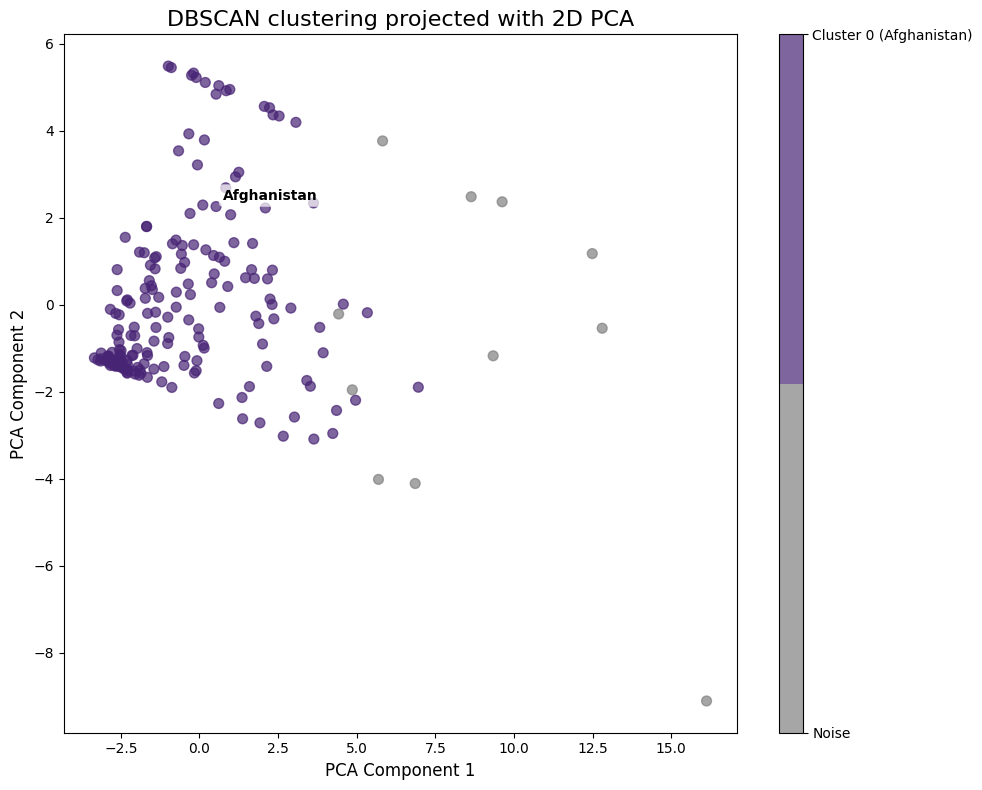

-----------------------
Epsilon: 4.0
Min Samples: 12
silhouette_score: 0.335518175413631
davies_bouldin_score: 0.9721944339312224
Number of clusters:  2
Number of points in cluster 0: 160
['Afghanistan' 'Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea" 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Fiji' 'Finland' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guyana' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel'


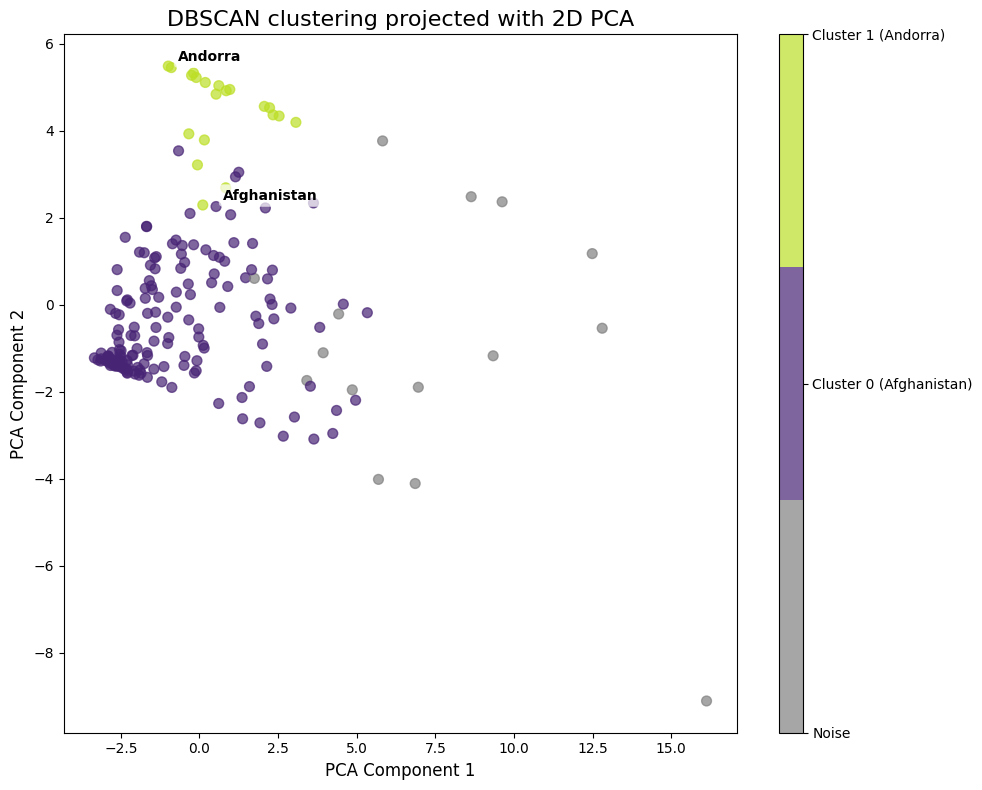

In [71]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np 
import matplotlib.pyplot as plt

eps_list = np.linspace(0.1, 4, 7)
min_samples_list = np.round(np.linspace(2, 12, 4)).astype(int)
score = np.zeros((len(eps_list), len(min_samples_list)))

for eps in range(len(eps_list)):
    for min_samples in range(len(min_samples_list)):
        dbscan = DBSCAN(eps=eps_list[eps], min_samples=min_samples_list[min_samples])
        dbscan.fit(clustering_data)
        mask = dbscan.labels_ != -1
        data = clustering_data[mask]
        labels = dbscan.labels_[mask]
        combined_df['Cluster'] = dbscan.labels_


        print("-----------------------")
        print(f"Epsilon: {eps_list[eps]}")
        print(f"Min Samples: {min_samples_list[min_samples]}")
        score[eps, min_samples] = evaluate_clusters(silhouette_score, data, labels)
        score[eps, min_samples] = evaluate_clusters(davies_bouldin_score, data, labels)
        print("Number of clusters: " ,len(np.unique(labels)))
        for label in np.unique(labels):
            print(f"Number of points in cluster {label}: {len(data[labels == label])}")
            representative_countries = np.array(combined_df.loc[combined_df['Cluster']==label, 'Location'])
            print(representative_countries)
            print()

        plot_clusters_2d(dbscan, clustering_data, combined_df, noise=True)

In [39]:
combined_df['Cluster']==0

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Name: Cluster, Length: 195, dtype: bool

In [ ]:
    

plt.plot(K, score)
plt.xlabel("k")
plt.ylabel("Davies Bouldin Score")
mask = dbscan.labels_ != -1
data = clustering_data[mask]
labels = dbscan.labels_[mask]


evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)
plot_clusters_2d(dbscan, clustering_data, combined_df, noise=True)


In [ ]:

plt.plot(K, score)
plt.xlabel("k")
plt.ylabel("Davies Bouldin Score")
mask = ac.labels_ != -1
data = clustering_data[mask]
labels = ac.labels_[mask]


evaluate_clusters(silhouette_score, data, labels)
evaluate_clusters(davies_bouldin_score, data, labels)
plot_clusters_2d(ac, clustering_data, combined_df, noise=True)


In [7]:
print(a[0])
print(a[1])
print(a[2])
print(a[3])

NameError: name 'a' is not defined